# Part 1 PCA

For this part of the project, you will be using the MNIST fashion data which can be reached as(there are many ways to reach out the data):

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnistX = mnist['data']
mnistX.shape

(70000, 784)

First apply PCA to the training data to find the transformation into a lower dimensional space.
How many dimensions do we need to explain 90% of the total variation in the data?
Apply the SAME centering and projection to the test data,What dimension did we embed into?

In [14]:
mnistX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


All the features (pixel1 to pixel784) are float type

In [15]:
type(mnistX)

pandas.core.frame.DataFrame

In [6]:
mnistX.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [7]:
print("The sum of missing/null values in the data set: ",mnistX.isnull().sum().sum())

The sum of missing/null values in the data set:  0


The mnistX dataset has no null values.

In [3]:
mnistY = mnist['target'] #This is our target variable or the classes

In [9]:
mnistY.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

The target feature mnistY has 10 classes(0,1,2,3,4,5,6,7,8,9)

In [10]:
mnistY.shape

(70000,)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnistX, mnistY, test_size=0.3, random_state=45)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')


Training samples: 49,000
Test samples: 21,000


### Data Description
- `pixel1 - pixel784`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 10 classes.

###  Evaluating the number of Principal Components

Standardize the features using StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Find the covariance matrix which is used to find the eigen values of the feature sets

In [13]:
import numpy as np
cov_matrix = np.cov(X_train_std.T)
print(cov_matrix)
cov_matrix.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(784, 784)

Evaluating the eigenpairs from the covariance matrix

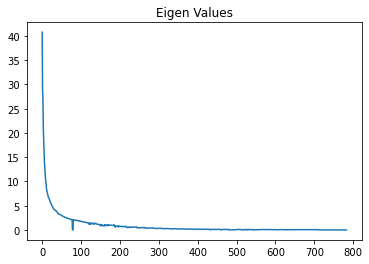

In [14]:
import matplotlib.pyplot as plt
eig_val, eig_vec = np.linalg.eig(cov_matrix)
plt.plot(eig_val)
plt.title("Eigen Values")
plt.show()

Finding the number of components that could explain 90% of the variance in the dataset

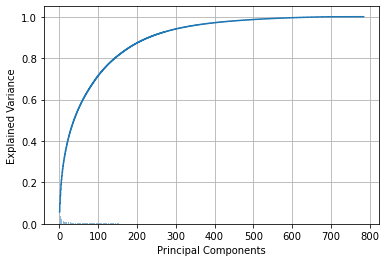

In [15]:
total_eig_val = sum(eig_val)
variance = [(i/total_eig_val) for i in sorted(eig_val, reverse = True)]
cum_variance = np.cumsum(variance)
plt.bar(range(1,785), variance, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,785), cum_variance, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

> - First 50 components explain nearly 60% of teh varaince in the data.
> - First 150 components explain nearly 80% of the variance.
> - First 250 components explain nearly 90% of the variance.
> ### We consider first 250 components for the PCA based learning in this project on the training data set, i.e., k = 250

### Finding the number of principal components for test data set

In [16]:
import numpy as np
cov_matrix1 = np.cov(X_test_std.T)
print(cov_matrix1)
cov_matrix.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(784, 784)

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


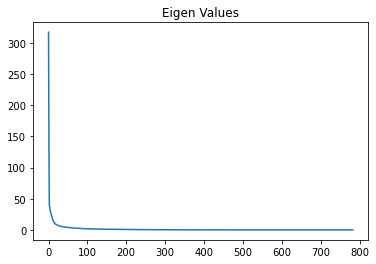

In [17]:
import matplotlib.pyplot as plt
eig_val1, eig_vec1 = np.linalg.eig(cov_matrix1)
plt.plot(eig_val1)
plt.title("Eigen Values")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


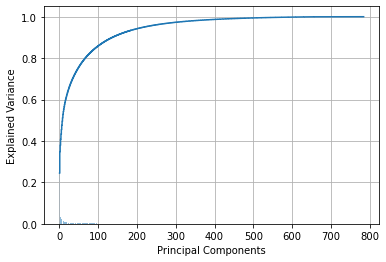

In [18]:
total_eig_val1 = sum(eig_val1)
variance1 = [(i/total_eig_val1) for i in sorted(eig_val1, reverse = True)]
cum_variance1 = np.cumsum(variance1)
plt.bar(range(1,785), variance1, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,785), cum_variance1, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

> #### From the above plot we observe that the 90% of the variance in the test data set is explained by first 150 components.

A natural question to ask is what did we gain from this projection? Well, our algorithms will run MUCH faster on the reduced dimension data. Will we sacrifice accuracy for this speed boost? 

For this section, I would like you to run K-NN on the original data and on the reduced dimension data from PCA (NOTE: IN YOUR WRITE-UP, PLEASE GIVE A SHORT TEXT DESCRIPTION OF EACH CLASSIFIER BEFORE YOU USE IT).

Use 10-fold Cross validation repeated 10 times to tune K
- Consider K = 1, 2, 3, 4, 5, 6 in the repeated CV
- Include a running time evaluation
- Here I would like you to compare performance across data sets both based on accuracy (on the test data) AND on running time
- How do the estimated test accuracies obtained from Cross Validation compare with the accuracies on the actual test data? Explain.

## k-Nearest Neighbors (kNN)

- kNN algorithm memorizes the data in train data set and compares them with the test data set to determine which lies close to each of them.
- Each data point uses two hyperparameters - k and distance - to determine their "closeness" to a data point in the train data set
- This model is prone to overfitting
 > k
 > - It determines the balance between underfitting and overfitting.
 
 > Distance
 > - Uses the Euclidan/Minkowski distance formula to find how close a test data point is from a train data point
 - Here we are dealing with a (49000, 784) sized training dataset which can be memory exhausting.
 - We can either split the dataset into a sample set and run the model

### On the original Data set

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_m = Pipeline([('scaling', StandardScaler()),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [1, 2, 3, 4, 5, 6], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=10)
#knn_results = knn_results.fit(X_train_std, y_train)

In [20]:
import time
start_time = time.time()
knn_results.fit(X_train_std, y_train)
knn_score = knn_results.score(X_test_std, y_test)
print(f"k-Nearest Neighbor Accuracy Score: {knn_score:.2%}")
time_elapsed = time.time() - start_time
print(f"Time for model to run on original data set: {time_elapsed:.5f} seconds")

k-Nearest Neighbor Accuracy Score: 94.57%
Time for model to run on original data set: 1110.35732 seconds


In [21]:
best_knn = knn_results.best_params_
best_knn

{'model__n_neighbors': 4, 'model__weights': 'distance'}

In [22]:
best_knn['model__n_neighbors']

4

In [23]:
knn_original = KNeighborsClassifier(n_neighbors = best_knn['model__n_neighbors'])
start_time1 = time.time()
knn_original.fit(X_train_std,y_train)
time_elapsed1 = time.time() - start_time1
accuracy_test_1 = knn_original.score(X_test_std, y_test)
print(f"Time for best model to run on original data set: {time_elapsed1:.5f} seconds")
print(f'k-Nearest Neighbor best Accuracy Score on original test data set: {accuracy_test_1:.2%}')

Time for best model to run on original data set: 0.12894 seconds
k-Nearest Neighbor best Accuracy Score on original test data set: 93.94%


In [25]:
accuracy_train_1 = knn_original.score(X_train_std, y_train)
print(f'k-Nearest Neighbor best Accuracy Score on original train data set: {accuracy_train_1:.2%}')

k-Nearest Neighbor best Accuracy Score on original train data set: 96.34%


#### Time Taken to run the best model on the original test data set = 0.12894 s

### On the Dimension reduced data set

In [26]:
from sklearn.decomposition import PCA
pipeline_knn_pca = Pipeline([('pca',PCA()),
                   ('model',KNeighborsClassifier())])
params_knn_pca = {'model__n_neighbors':[1,2,3,4,5,6], 'pca__n_components': [150,200,250]} 
knn_pca = GridSearchCV(pipeline_knn_pca, param_grid = params_knn_pca, scoring = 'accuracy',cv = 10, refit = True)


In [27]:
start_time2 = time.time()
knn_pca.fit(X_train_std, y_train)
time_elapsed2 = time.time() - start_time2
knn_pca_score = knn_pca.score(X_test_std, y_test)
knn_pca_train_score = knn_pca.score(X_train_std, y_train)

In [33]:
print(f"k-Nearest Neighbor Accuracy Score on reduced test data set: {knn_pca_score:.2%}")
print(f"Time for model to run on reduced test data set: {time_elapsed2:.5f} seconds")
print(f"k-Nearest Neighbor Accuracy Score on reduced train data set: {knn_pca_train_score:.2%}")

k-Nearest Neighbor Accuracy Score on reduced test data set: 95.44%
Time for model to run on reduced test data set: 2069.43638 seconds
k-Nearest Neighbor Accuracy Score on reduced train data set: 97.69%


In [36]:
best_pca_knn = knn_pca.best_params_['model__n_neighbors']
knn_pca.best_params_['pca__n_components']

150

In [31]:
knn_pca_data = KNeighborsClassifier(n_neighbors = best_pca_knn)
start_time3 = time.time()
knn_pca_data.fit(X_train_std,y_train)
time_elapsed3 = time.time() - start_time3
accuracy_test_2 = knn_pca_data.score(X_test_std, y_test)
accuracy_train_2 = knn_pca_data.score(X_train_std, y_train)

In [34]:
print(f"Time for best model to run on reduced test data set: {time_elapsed3:.5f} seconds")
print(f'k-Nearest Neighbor best Accuracy Score on reduced test data set: {accuracy_test_2:.2%}')
print(f'k-Nearest Neighbor best Accuracy Score on reduced train data set: {accuracy_train_2:.2%}')

Time for best model to run on reduced test data set: 0.10764 seconds
k-Nearest Neighbor best Accuracy Score on reduced test data set: 94.25%
k-Nearest Neighbor best Accuracy Score on reduced train data set: 97.11%


#### Time taken to run the model after implementing PCA on test data set = 0.10764 s

> - The number of components considered for the model = 150, it matches with what we concluded from the variance explanation plot.

#### Comparison between using original data set versus PCA implemented Data set
> |  Data set  |  Train Accuracy  | Test Accuracy | Test Time |
> |------------|------------------|---------------|-----------|
> |  Original  |      96.34%      |     93.94%    |  0.12894s |
> |  PCA-data  |      97.11%      |     94.25%    |  0.10764s |

- Both the models give a reasonable train and test accuracy.
- On comparing, the data after using PCA gives more accuracy and is executed in lesser time.